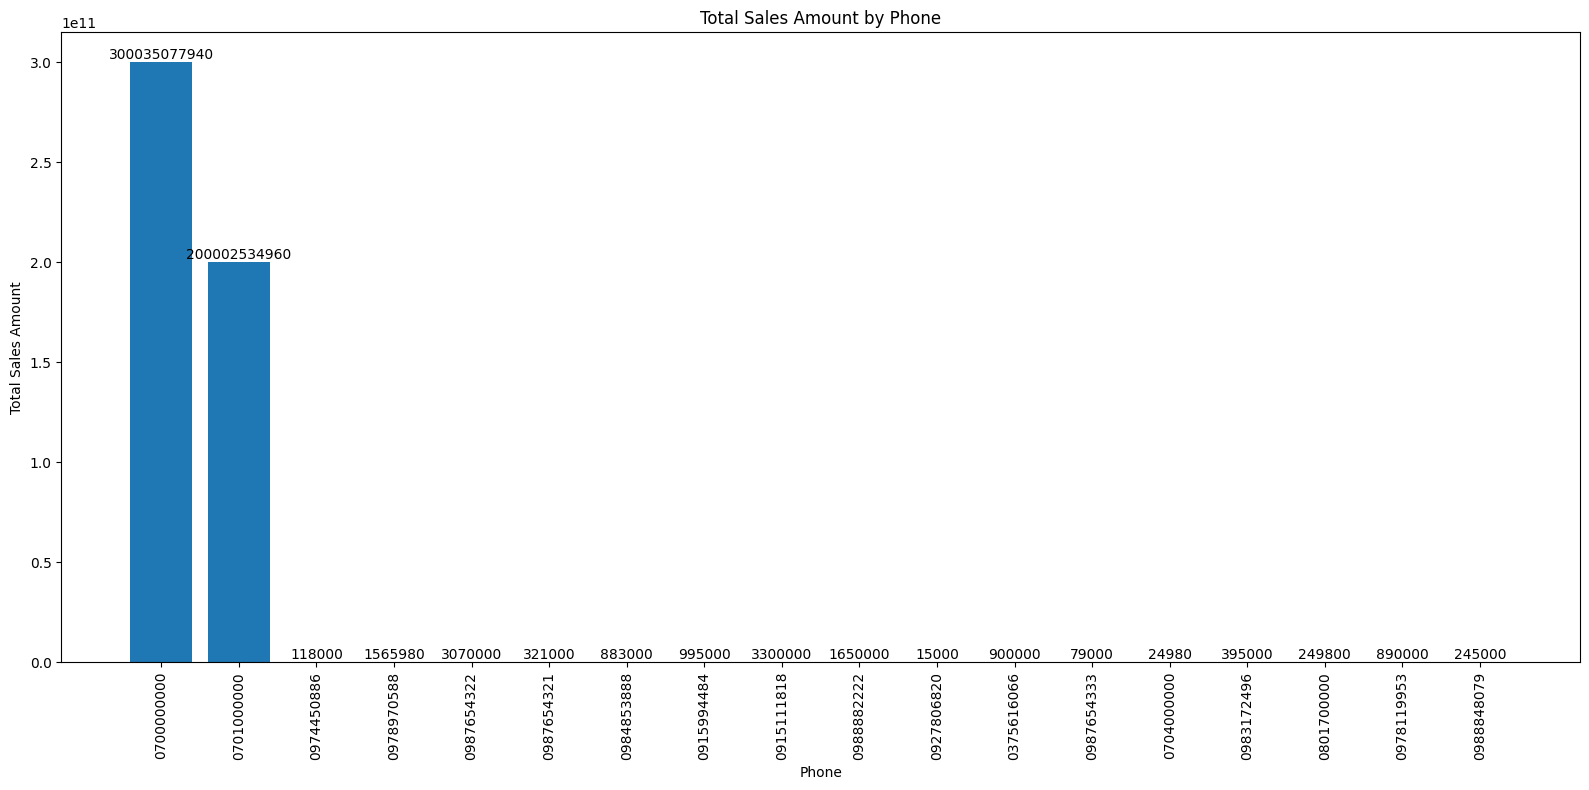

In [34]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

conn = psycopg2.connect( 
    dbname="demo1",
    user="postgres",
    password="password",
    host="localhost",
    port="5432")

cur = conn.cursor()
cur.execute('SELECT ud.phone, SUM(sf.sales_amount), COUNT(sf.quantities) FROM sales_fact sf JOIN user_dim ud ON ud.id = sf.user_dim_id GROUP BY ud.id ORDER BY COUNT(sf.quantities) DESC;')
result = cur.fetchall()

df = pd.DataFrame(result, columns=['phone', 'total_sales_amount', 'quantity_count'])

threshold = 5

df['total_sales_amount'] = np.where(df['total_sales_amount'] < threshold, 0, df['total_sales_amount'])

plt.figure(figsize=(16, 8))
plt.bar(df['phone'], df['total_sales_amount'], align='center')
plt.xlabel('Phone')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Phone')
plt.xticks(rotation=90)
plt.tight_layout()

for i, v in enumerate(df['total_sales_amount']):
    plt.text(i, v, str(v), color='black', ha='center', va='bottom')

plt.show()

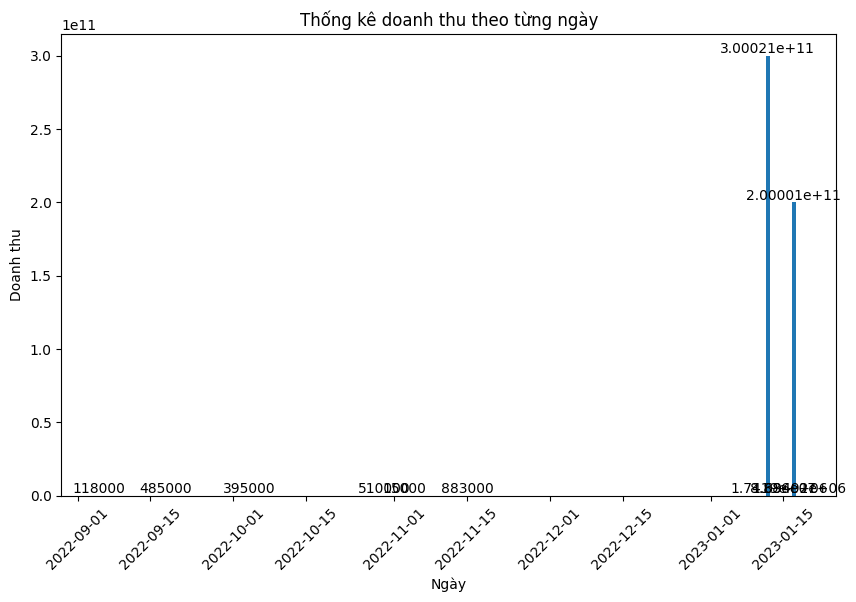

In [43]:
import psycopg2
import matplotlib.pyplot as plt

conn = psycopg2.connect(
    dbname="demo1",
    user="postgres",
    password="password",
    host="localhost",
    port="5432"
)

cur = conn.cursor()

cur.execute("""
    SELECT DATE(od.created_at), ROUND(SUM(sf.sales_amount)::NUMERIC, 2)
    FROM sales_fact sf
    JOIN order_dim od ON od.id = sf.order_dim_id
    GROUP BY DATE(od.created_at)
""")

rows = cur.fetchall()

dates = [row[0] for row in rows]
sales_amounts = [row[1] for row in rows]

cur.close()
conn.close()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(dates, sales_amounts)
ax.set_xlabel('Ngày')
ax.set_ylabel('Doanh thu')
ax.set_title('Thống kê doanh thu theo từng ngày')

for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation=45)
plt.show()

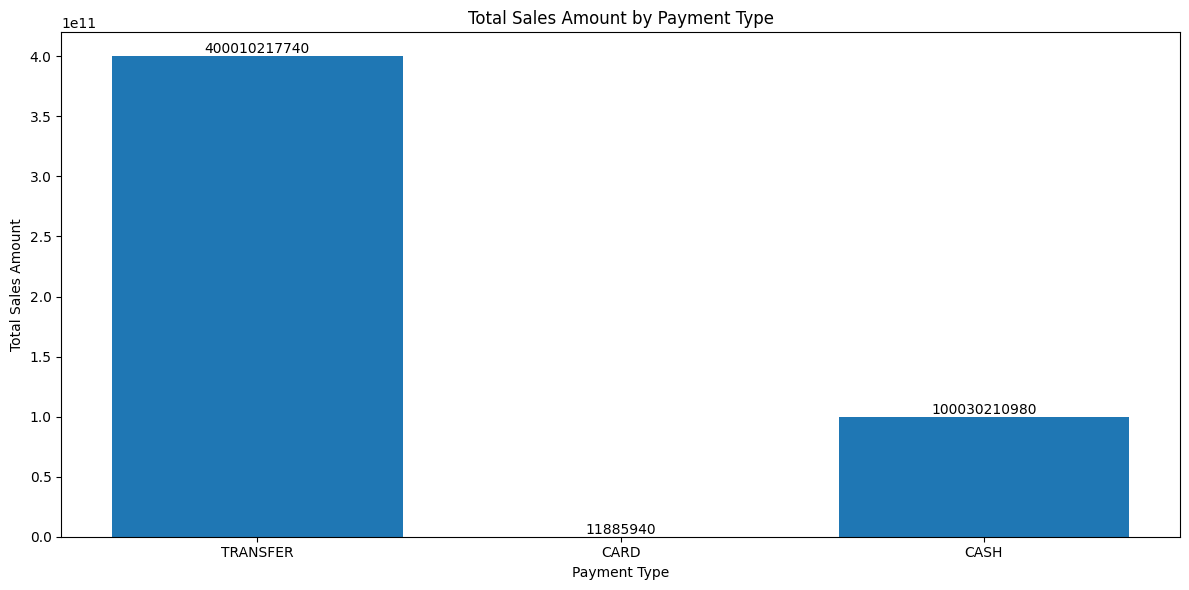

In [45]:
import psycopg2
import matplotlib.pyplot as plt

conn = psycopg2.connect(
    dbname="demo1",
    user="postgres",
    password="password",
    host="localhost",
    port="5432"
)

cur = conn.cursor()

cur.execute('SELECT payment_type, SUM(sales_amount) FROM sales_fact GROUP BY payment_type;')
result = cur.fetchall()

payment_types = [row[0] for row in result]
total_sales_amounts = [row[1] for row in result]

plt.figure(figsize=(12, 6))
plt.bar(payment_types, total_sales_amounts)
plt.xlabel('Payment Type')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Payment Type')
plt.tight_layout()

for i, v in enumerate(total_sales_amounts):
    plt.text(i, v, str(v), color='black', ha='center', va='bottom')

plt.show()


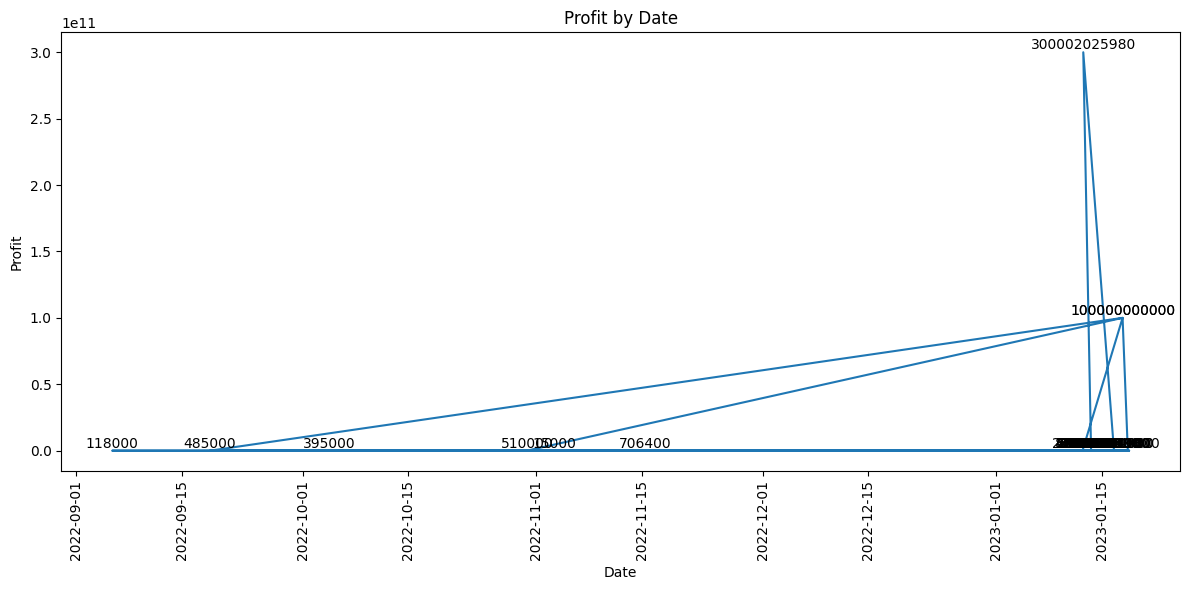

In [49]:
import psycopg2
import matplotlib.pyplot as plt

conn = psycopg2.connect(
    dbname="demo1",
    user="postgres",
    password="password",
    host="localhost",
    port="5432"
)

cur = conn.cursor()

cur.execute("""
    SELECT od.created_at, SUM(sf.sales_amount - sf.discount) as profit
    FROM sales_fact sf
    JOIN order_dim od ON od.id = sf.order_dim_id
    GROUP BY od.created_at
""")
result = cur.fetchall()

dates = [row[0] for row in result]
profits = [row[1] for row in result]

plt.figure(figsize=(12, 6))
plt.plot(dates, profits)
plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Profit by Date')
plt.xticks(rotation=90)
plt.tight_layout()

for i in range(len(dates)):
    plt.text(dates[i], profits[i], str(profits[i]), ha='center', va='bottom')

plt.show()

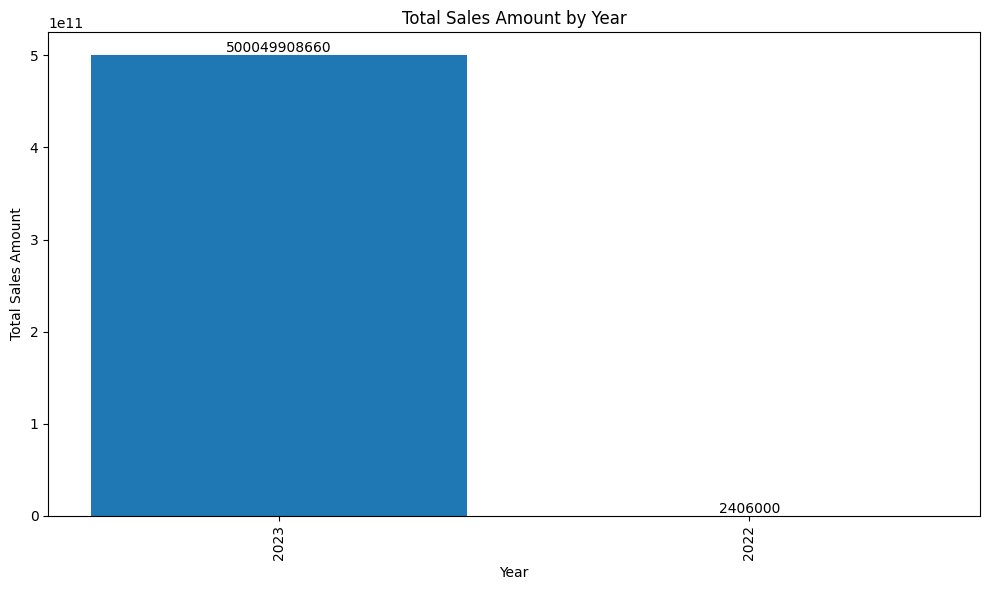

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

conn = psycopg2.connect(
    dbname="demo1",
    user="postgres",
    password="password",
    host="localhost",
    port="5432"
)
cur = conn.cursor()

cur.execute("""
    SELECT SUM(sf.sales_amount), to_char(od.created_at, 'YYYY') AS year
    FROM sales_fact sf
    JOIN order_dim od ON od.id = sf.order_dim_id
    GROUP BY to_char(od.created_at, 'YYYY')
""")
result = cur.fetchall()

df = pd.DataFrame(result, columns=['total_sales_amount', 'year'])

plt.figure(figsize=(10, 6))
plt.bar(df['year'], df['total_sales_amount'])
plt.xlabel('Year')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Year')
plt.xticks(rotation=90)
plt.tight_layout()

for i, v in enumerate(df['total_sales_amount']):
    plt.text(i, v, str(v), color='black', ha='center', va='bottom')

plt.show()

cur.close()
conn.close()
